In [ ]:
import pandas as pd
! wget -O train.csv https://www.dropbox.com/s/bj4a1mxfqy2foqv/train.csv
! wget -O test.csv https://www.dropbox.com/s/6w0sbwzfl6trpq6/test.csv

--2021-09-27 06:22:17--  https://www.dropbox.com/s/bj4a1mxfqy2foqv/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/bj4a1mxfqy2foqv/train.csv [following]
--2021-09-27 06:22:17--  https://www.dropbox.com/s/raw/bj4a1mxfqy2foqv/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc40fb2e6f3a04067bba1a7cb177.dl.dropboxusercontent.com/cd/0/inline/BW_FkHSCjvhLUCWs2y0rJ05RnYapBA8qzyRdW55gjzPWvSEv_M3nKRaI03Uf2PLC9WuzyKNWu2-5OhywMUvp81HnA_2QwUrYFNhytbtGsJlDUAnxNlPcpQB57wzKI7TKrnZIQWRmhlMPQYehsaPwkRj3/file# [following]
--2021-09-27 06:22:18--  https://uc40fb2e6f3a04067bba1a7cb177.dl.dropboxusercontent.com/cd/0/inline/BW_FkHSCjvhLUCWs2y0rJ05RnYapBA8qzyRdW55gjzPWvSEv_M3nKRaI03Uf2PLC9WuzyKNWu2-5OhywMUvp81HnA_2QwUrYFNh

In [ ]:
trd = pd.read_csv('train.csv', index_col = 'PassengerId')
tsd = pd.read_csv('test.csv', index_col = 'PassengerId')

data = pd.concat([trd, tsd], ignore_index=False, sort = False)

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Проверяем графически, где необходимо учитывать пустые ячейки

Text(0.5, 1.0, 'Missing values heatmap')

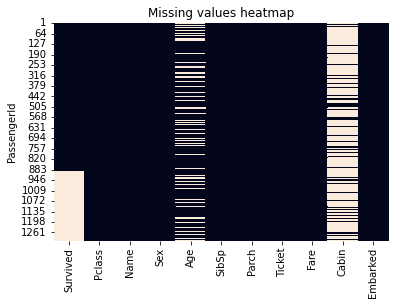

In [ ]:
import seaborn as sns

data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

Замена значений "male" и "female" на 1 и 0 соответственно

In [ ]:
from sklearn import preprocessing, metrics

le = preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
le.transform(["male", "female"])

array([1, 0])

In [ ]:
data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
6,0.0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S


**1 Задание**

In [ ]:
Sall = data['Sex'].value_counts(0).sort_index()
print('Мужчин на корабле: ', Sall.iloc[1])
print('Женщин на корабле: ', Sall.iloc[0])

Мужчин на корабле:  843
Женщин на корабле:  466


**2 Задание**

Пустым ячейкам в колонке Survived присваиваем 0

In [ ]:
data.loc[pd.isnull(data['Survived']), 'Survived'] = 0.0
srvd = data['Survived'].value_counts(0).sort_index()

In [ ]:
print('Общий процент выживших составил: ', round(srvd.iloc[1]/data.shape[0]*100), '%')

a = data[['Sex', 'Survived']].value_counts().sort_index()
print("Из них: ", round((a.iloc[3]/(a.iloc[1]+a.iloc[3])*100)), '% мужчины и ', round(a.iloc[1]/(a.iloc[1]+a.iloc[3])*100), "% - женщины")



Общий процент выживших составил:  26 %
Из них:  32 % мужчины и  68 % - женщины


**3 Задание**

Процент пассажиров 3-его класса составил:  54 %


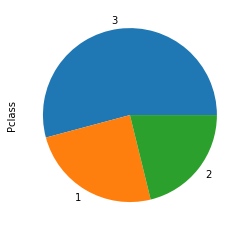

In [ ]:
import seaborn as sns
thirdclass = data['Pclass'].value_counts(0).sort_index().iloc[2]

data['Pclass'].value_counts().plot.pie()
print('Процент пассажиров 3-его класса составил: ', round(thirdclass/data.shape[0]*100), '%')

**4 Задание**

In [ ]:
import statistics 

grp = data.groupby(['Sex', 'Pclass'])
a = grp.Age.apply(lambda x: x.fillna(x.median())).values
data.Age = list(map(lambda x: int(x), a))

print('Медиана возрастов: ', statistics.median(data['Age']))
print('Средний возраст: ', round(statistics.mean(data['Age'])))

Медиана возрастов:  26
Средний возраст:  29
